<a href="https://colab.research.google.com/github/thomaskopalidis/Projects/blob/main/A01_regression_kopalidis_thomas_0100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Medical Cost Personal Datasets


This dataset contains 1,338 records of individuals with 7 features     age, sex, bmi, children, smoker ,region, charges.



The goal is to predict a continuous outcome, the annual insurance cost (charges - target variable) based on the other features.

https://www.kaggle.com/datasets/mirichoi0218/insurance


1)  What specific problem does your project aim to solve? If possible, describe the benefit of using Machine Learning techniques over conventional methods if any.

The goal of this project is to predict a patient’s medical insurance charges (charges) from demographic and lifestyle variables (age, sex, BMI, children, smoker, region).


Why Machine Learning vs. conventional methods:

Relationships are non-linear (e.g., sharp jump in cost for smokers and for high BMI). ML models (e.g., tree ensembles) capture these interactions better than a single global formula.

ML supports systematic validation (cross-validation) and feature engineering with measurable gains.



# Step 1.Import Dataset,  libraries and Read Dataset

In [ ]:
#Import Libraries
import warnings
warnings.filterwarnings('ignore')
import os
# Import Neccessary libraries
import numpy as np
import pandas as pd

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the decimal format
pd.options.display.float_format = "{:.2f}".format

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mirichoi0218/insurance")

print("Path to dataset files:", path)
file_path = os.path.join(path, 'insurance.csv')
# load cvs file into pandas dataframe for analysis
df = pd.read_csv(file_path)



Using Colab cache for faster access to the 'insurance' dataset.
Path to dataset files: /kaggle/input/insurance


# Step 2. Data Summary

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [ ]:
df.info()  #check the columns types, dtype, non null counts
# from the info we can see that we have 4 numeric variables and 3 categorical variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# othe way to see the types of data is with command .dtypes
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [ ]:
df.shape

(1338, 7)

In [ ]:
# show the number of unique values for each variable
df.nunique()

,0
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


so as we can see in this dataset there are 7 variables and 1338 rows (records).


check for missing values

#Step 3. EDA (Exploratory Data Analysis)

In [ ]:
# Count numeric columns
num_cols = df.select_dtypes(include=['number']).columns
num_count = len(num_cols)

# Count categorical columns (including text)
cat_cols = df.select_dtypes(include=['object', 'category']).columns
cat_count = len(cat_cols)



print(f"Number of categorical columns: {cat_count}")
print(f"Which are the categorical columns: {cat_cols}")
print("-------------------------------")
print(f"Number of numerical columns: {num_count}")
print(f"Which are the numerical columns: {num_cols}")

Number of categorical columns: 3
Which are the categorical columns: Index(['sex', 'smoker', 'region'], dtype='object')
-------------------------------
Number of numerical columns: 4
Which are the numerical columns: Index(['age', 'bmi', 'children', 'charges'], dtype='object')


In [ ]:
# check the classes in numerical variables
df.describe()

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


In [ ]:
# check the classes in categorical variables
for col in cat_cols:
    unique_values = df[col].unique()
    print(f"Categorical variable '{col}': {unique_values}")

Categorical variable 'sex': ['female' 'male']
Categorical variable 'smoker': ['yes' 'no']
Categorical variable 'region': ['southwest' 'southeast' 'northwest' 'northeast']


##Handling Duplicates

In [ ]:
# Handle duplicates
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data)
print("Number of duplicate rows:", df.duplicated().sum())

number of duplicate rows:       age   sex   bmi  children smoker     region  charges
581   19  male 30.59         0     no  northwest  1639.56
Number of duplicate rows: 1


In [ ]:
#remove duplicates
df = df.drop_duplicates()

##Check for missing values,  outliers, strange values

In [ ]:
#missisng value
df.isnull().sum()
#there is no missing value in the dataset

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


#Step 4. Feature Understanding

##Univariate Analysis
The univariate analysis explores each variable individually to understand its distribution and detect outliers.

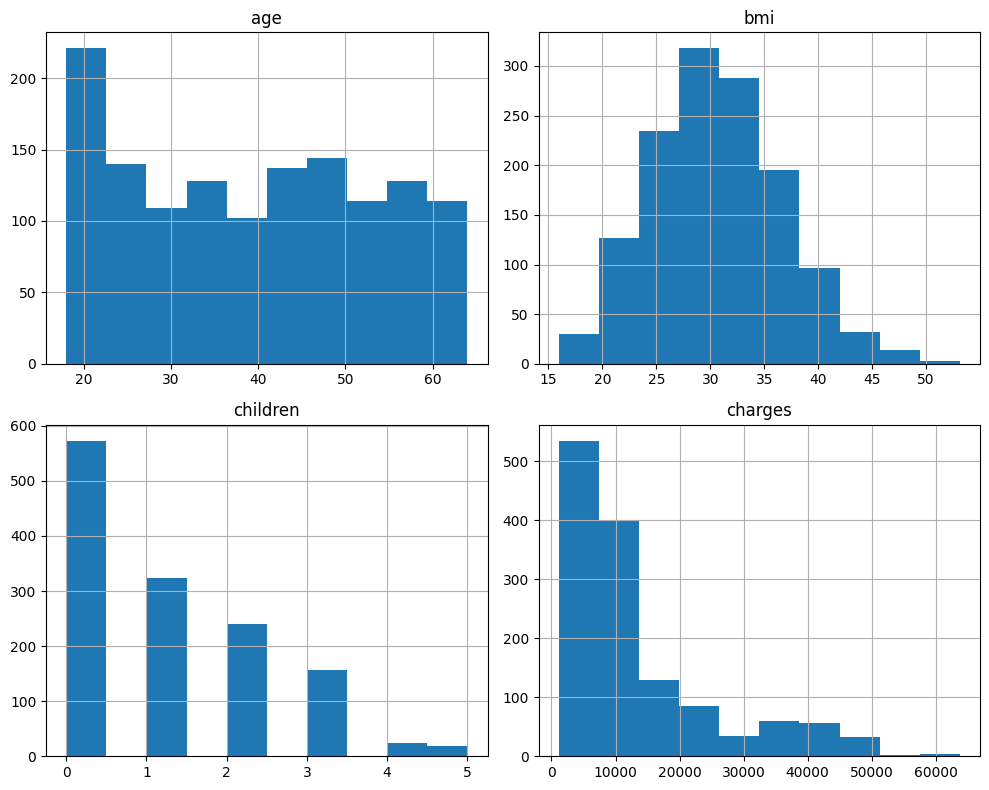

In [ ]:
df[num_cols].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

##Categorical
We can see them with bar chart, pie chart

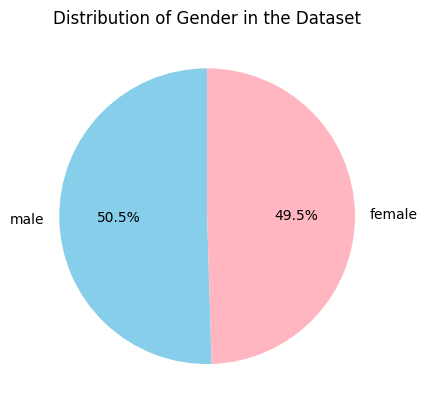

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


df['sex'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['skyblue', 'lightpink'],  # Match order of gender categories
    startangle=90
)
plt.title("Distribution of Gender in the Dataset")
plt.ylabel("")
plt.show()

We can see from both pie and bar chart that the gender is equal.

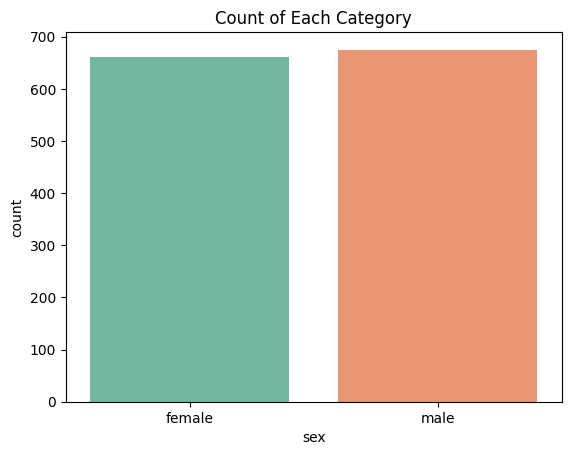

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.countplot(x='sex', data=df, palette='Set2')
plt.title("Count of Each Category")
plt.show()
plt.savefig("Count of Each Category sex", dpi=300, bbox_inches='tight')

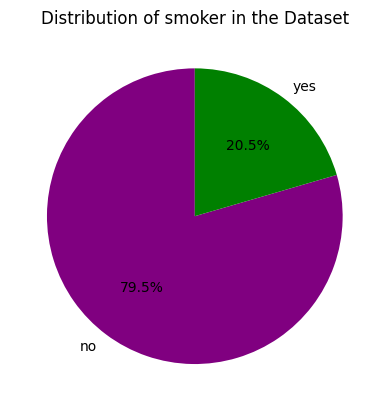

In [ ]:
df['smoker'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['purple', 'green'],
    startangle=90
)
plt.title("Distribution of smoker in the Dataset")
plt.ylabel("")
plt.show()

Here, we can see that in the dataset we have more non smoker people than smoker (80 vs 20 %).

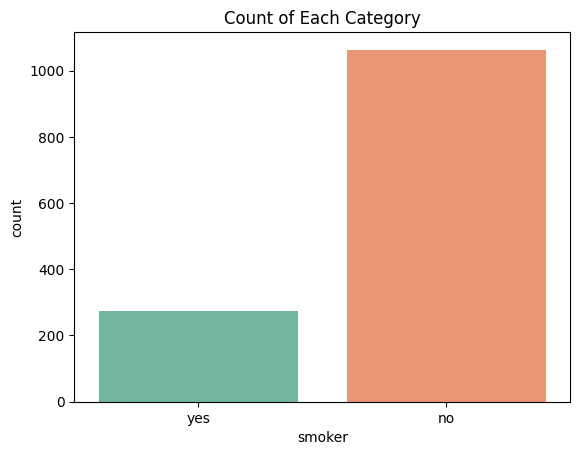

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.countplot(x='smoker', data=df, palette='Set2')
plt.title("Count of Each Category")
plt.show()
plt.savefig("Count of Each Category Smoker", dpi=300, bbox_inches='tight')

Also, here is the bar chart of smokers.

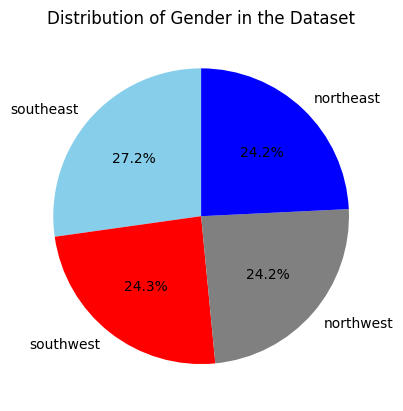

In [ ]:
df['region'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['skyblue', 'red', 'grey', 'blue'],
    startangle=90
)
plt.title("Distribution of Gender in the Dataset")
plt.ylabel("")
plt.show()

The pie chart about gender shows us that more less the region has the same % and we can see the same below in the bar chart.

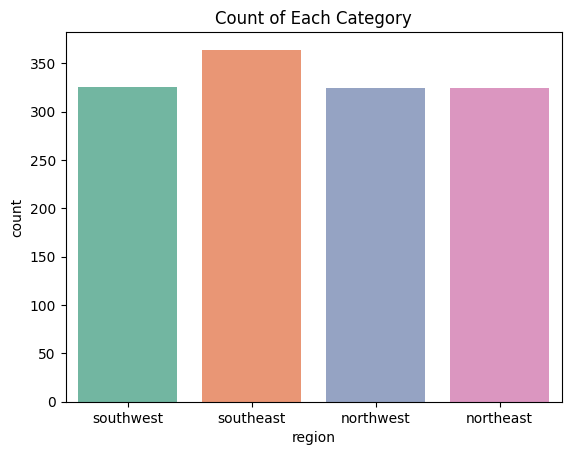

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.countplot(x='region', data=df, palette='Set2')
plt.title("Count of Each Category")
plt.show()
plt.savefig("Count of Each Category region", dpi=300, bbox_inches='tight')

##Multivariate Analysis

The charges by region

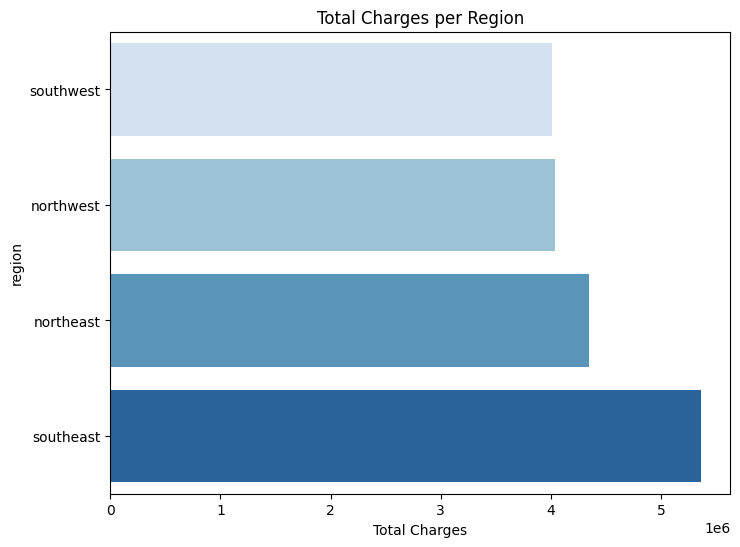

In [ ]:
charges = df.groupby('region')['charges'].sum().sort_values(ascending=True)

f, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.barplot(x=charges.values, y=charges.index, palette='Blues', ax=ax)
ax.set_xlabel("Total Charges")
ax.set_ylabel("region")
ax.set_title("Total Charges per Region")
plt.show()



So overall the highest medical charges are in the Southeast and the lowest are in the Southwest.

We combine the variables charges, sex and region to see their correlation.

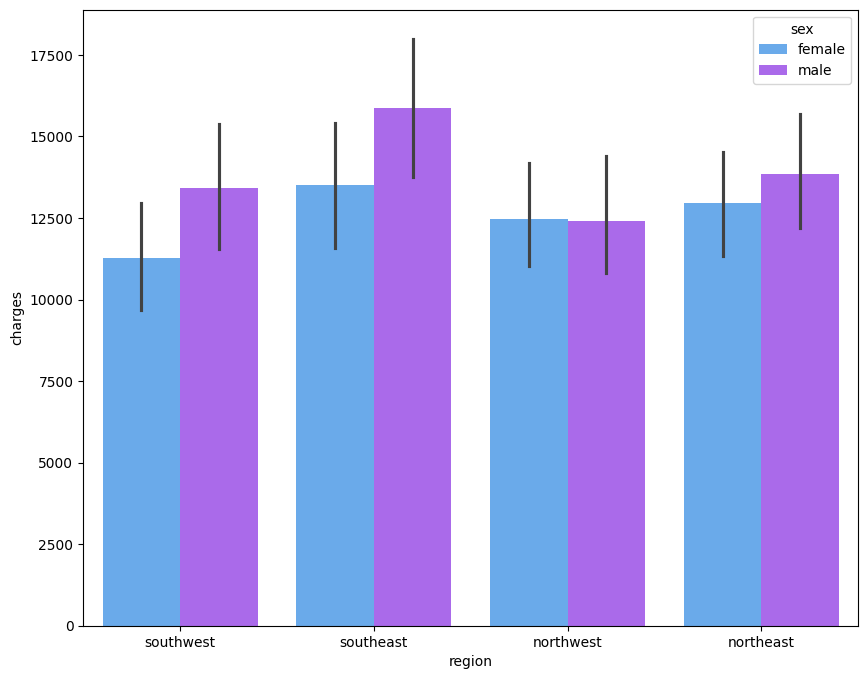

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

We can see the female has more charge than male especially in the southeast.

Wec continue with the variables smoke, region and charges.

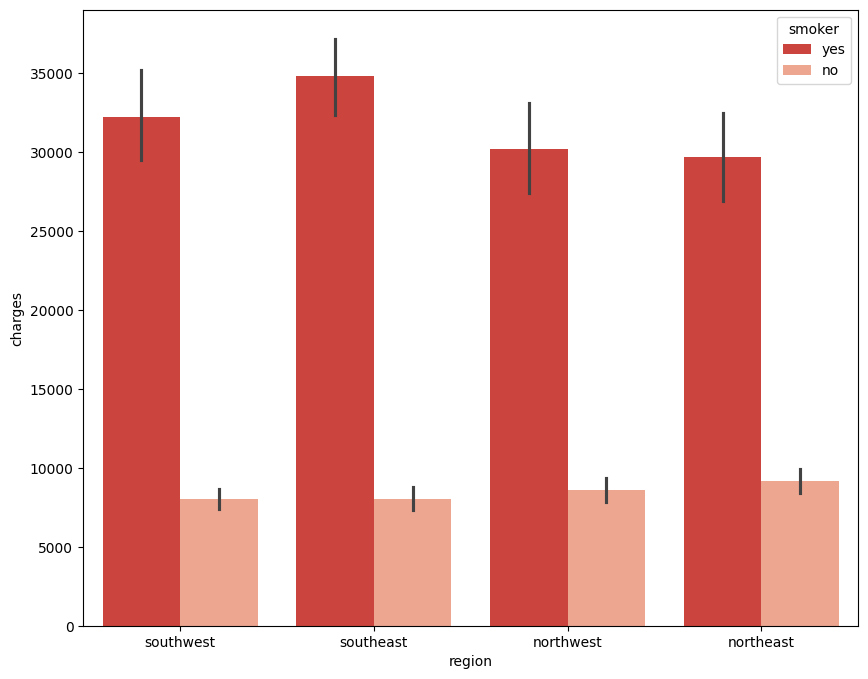

In [ ]:
f, ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='Reds_r')

Also, the charges for the smoker are way more that the non smokers.

Next, we can see the variables, region, charges and children.

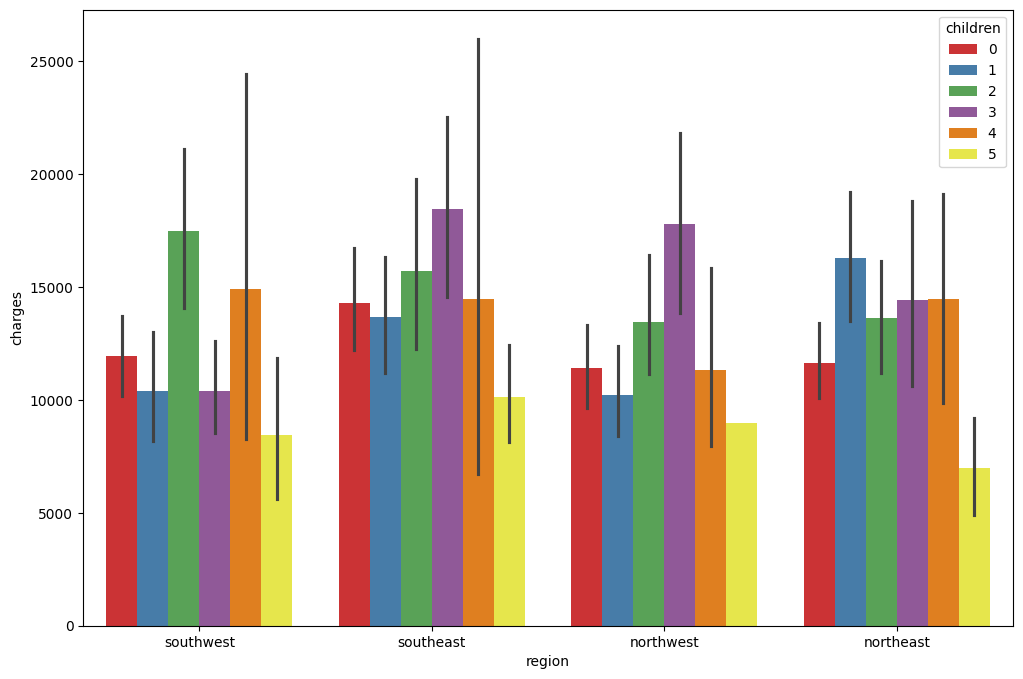

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')


People with childern tend to have higher medical cost.

#Step 5. Correlation matrix I (Multivariate Analysis)
Only for numeric variable

In [ ]:
correlation_matrix = df.corr(numeric_only=True)  # Only numeric columns
print(correlation_matrix)

          age  bmi  children  charges
age      1.00 0.11      0.04     0.30
bmi      0.11 1.00      0.01     0.20
children 0.04 0.01      1.00     0.07
charges  0.30 0.20      0.07     1.00


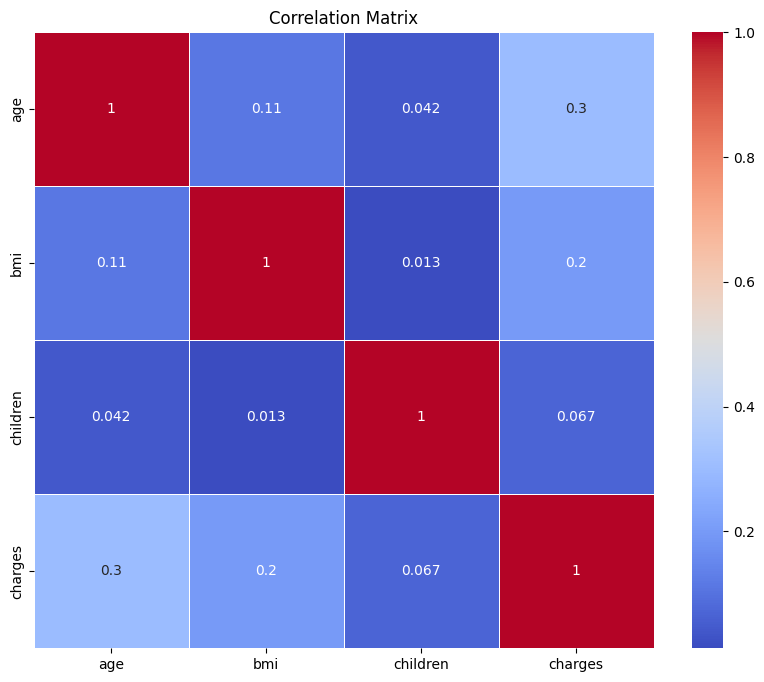

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Based the correlation matrix we can say that:

- There is a small positive correlation between age
and charges which it means that probably the older people tend to have higher charges, but it is not perfectly linear to make assumption for this.

- The bmi and charges has a 0.2 correlation, a weak positive correlation it means maybe the higher bmi tends to increase charges.

- The number of children doesnt correlated with charges.



#Step 6. Correlation matrix II



In [ ]:
def perform_one_hot_encoding(df, column_name):
    # Check if the column exists first
    if column_name not in df.columns:
        print(f" Column '{column_name}' not found! Available columns: {df.columns.tolist()}")
        return df  # Return unchanged
    # Create dummy variables
    dummies = pd.get_dummies(df[column_name], prefix=column_name)
    # Drop the original column and join the dummies
    df = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)
    return df

df = perform_one_hot_encoding(df, 'sex')
df = perform_one_hot_encoding(df, 'smoker')
df = perform_one_hot_encoding(df, 'region')



                   age   bmi  children  charges  sex_female  sex_male  \
age               1.00  0.11      0.04     0.30        0.02     -0.02   
bmi               0.11  1.00      0.01     0.20       -0.05      0.05   
children          0.04  0.01      1.00     0.07       -0.02      0.02   
charges           0.30  0.20      0.07     1.00       -0.06      0.06   
sex_female        0.02 -0.05     -0.02    -0.06        1.00     -1.00   
sex_male         -0.02  0.05      0.02     0.06       -1.00      1.00   
smoker_no         0.03 -0.00     -0.01    -0.79        0.08     -0.08   
smoker_yes       -0.03  0.00      0.01     0.79       -0.08      0.08   
region_northeast  0.00 -0.14     -0.02     0.01        0.00     -0.00   
region_northwest  0.00 -0.14      0.03    -0.04        0.01     -0.01   
region_southeast -0.01  0.27     -0.02     0.07       -0.02      0.02   
region_southwest  0.01 -0.01      0.02    -0.04        0.00     -0.00   

                  smoker_no  smoker_yes  region_no

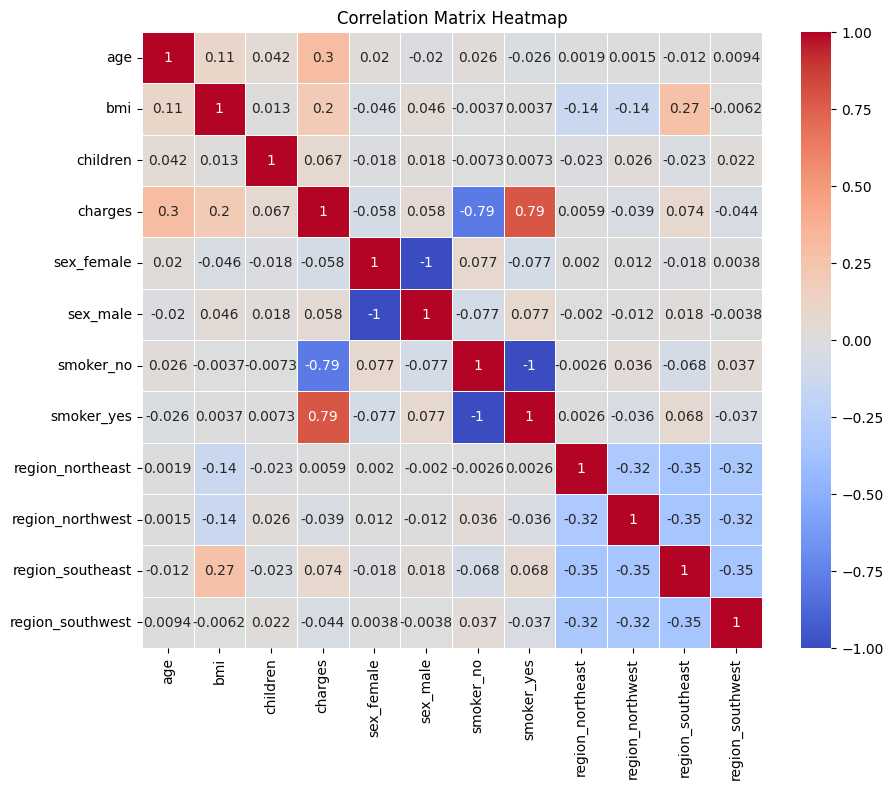

In [ ]:
correlation_matrix = df.corr(numeric_only=True)  # Only numeric columns
print(correlation_matrix)

#Graph 1
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

Now we use an overall correlation matrix for all the variables.

It seems that:
- There is strongest positive correlation between smoker (yes) and charges and a smoker is the single most important predictor of higher charges. And the opposite we have strong negative correlation for not smokers.

-  There is a small positive correlation between age
and charges which it means that probably the older people tend to have higher charges, but it is not perfectly linear to make assumption for this.

- The bmi and charges has a 0.2 correlation, a weak positive correlation it means maybe the higher bmi tends to increase charges.

- The number of children doesnt correlated with charges.

- The sex (female or male) has correlation close to 0 with the charges. So, sex doesn't play a role in charges in this dataset.

-Also, the regions has negligible effect on charges.

In cocnlusion
- **This means that smokers pay much higher medical costs that the non smokers.**
- **Older participants tend to have higher charges.**
- **Higher BMI is weakly linked to higher charges.**

- **These findings suggest that lifestyle choices (especially smoking) and age are the primary drivers of medical expenses.**

also, i made a heatmap to see the most correlated variables with charges.

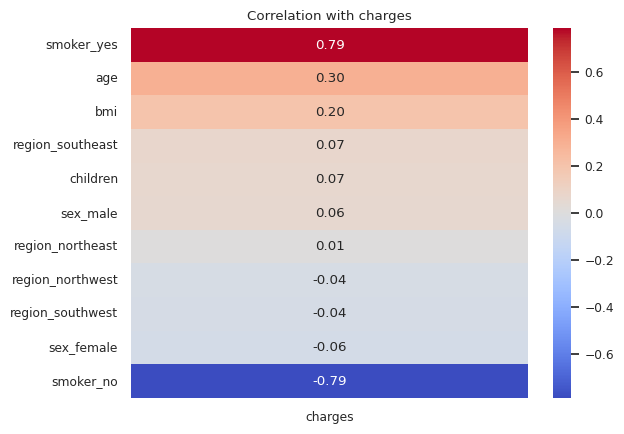

In [ ]:
# Graph 2
corr = df.corr()
target_corr = corr['charges'].drop('charges')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with charges')
plt.show()

#Step 7. Regression

3. The algorithm selection and details of each algorithm you tried, hyperparameters’ choice etc.

I select 2 ml models the linear regression and random forest regressor

##Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features & target
X = df.drop(['charges'], axis=1)
y = df['charges']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Fit linear regression
LR = LinearRegression().fit(X_train, y_train)

# Predictions
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)


print(f'R² score (test set): {LR.score(X_test, y_test):.3f}')


print('MSE train data: %.3f, MSE test data: %.3f' % (
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test, y_test_pred)
))
print('R² train data: %.3f, R² test data: %.3f' % (
    r2_score(y_train, y_train_pred),
    r2_score(y_test, y_test_pred)
))

R² score (test set): 0.744
MSE train data: 35256307.107, MSE test data: 40842992.193
R² train data: 0.752, R² test data: 0.744


##Random Forest Regressor

In [ ]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor


# Features & target
X = df.drop(['charges'], axis=1)
y = df['charges']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)



forest = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    criterion='squared_error',
    random_state=42,
    n_jobs=-1
)

forest.fit(X_train, y_train)

forest_train_pred = forest.predict(X_train)
forest_test_pred = forest.predict(X_test)

print(f'R² score (test set): {forest.score(X_test, y_test):.3f}')

print('MSE train data: %.3f, MSE test data: %.3f' % (
    mean_squared_error(y_train, forest_train_pred),
    mean_squared_error(y_test, forest_test_pred)
))
print('R2 train data: %.3f, R2 test data: %.3f' % (
    r2_score(y_train, forest_train_pred),
    r2_score(y_test, forest_test_pred)
))

R² score (test set): 0.851
MSE train data: 12989080.008, MSE test data: 23752728.469
R2 train data: 0.909, R2 test data: 0.851


In [ ]:
#Gather the models in a table
results = []

# Linear Regression
results.append({
    'Model': 'Linear Regression',
    'R2_train': r2_score(y_train, y_train_pred),
    'R2_test': r2_score(y_test, y_test_pred),
    'MSE_train': mean_squared_error(y_train, y_train_pred),
    'MSE_test': mean_squared_error(y_test, y_test_pred)
})

# Random Forest
results.append({
    'Model': 'Random Forest',
    'R2_train': r2_score(y_train, forest_train_pred),
    'R2_test': r2_score(y_test, forest_test_pred),
    'MSE_train': mean_squared_error(y_train, forest_train_pred),
    'MSE_test': mean_squared_error(y_test, forest_test_pred)
})

# Convert to DataFrame
results_df = pd.DataFrame(results)

print("\nModel Comparison:")
print(results_df)


Model Comparison:
               Model  R2_train  R2_test   MSE_train    MSE_test
0  Linear Regression      0.75     0.74 35256307.11 40842992.19
1      Random Forest      0.91     0.85 12989080.01 23752728.47


##Plots

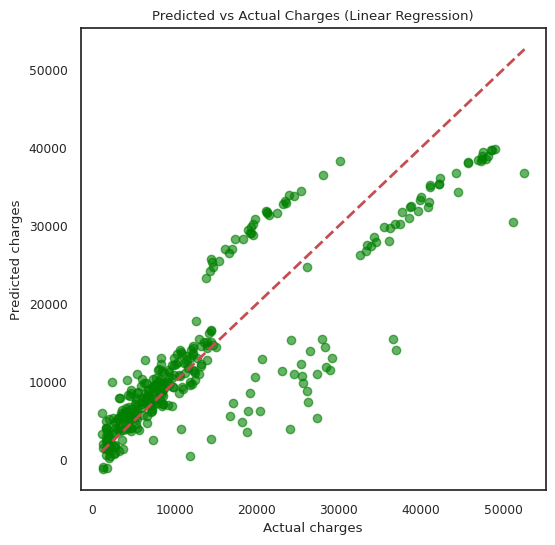

In [ ]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

linreg_train_pred = linreg.predict(X_train)
linreg_test_pred = linreg.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, linreg_test_pred, alpha=0.6, color="green")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)  # 45° line
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.title("Predicted vs Actual Charges (Linear Regression)")
plt.show()


This plot shows that many points deviating, especially for higher charges, so the linear model struggles to capture non-linear relationships.

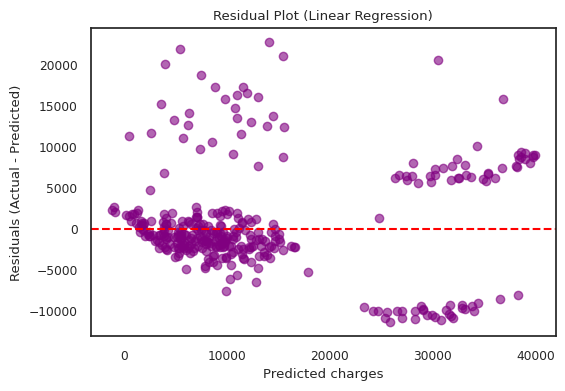

In [ ]:
residuals = y_test - linreg_test_pred

plt.figure(figsize=(6,4))
plt.scatter(linreg_test_pred, residuals, alpha=0.6, color="purple")
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted charges")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot (Linear Regression)")
plt.show()


In this plot i can see that that the model of  Linear Regression underfits means it cannot capture the complexity of the data. Because for higher predicted values, residuals are consistently biased

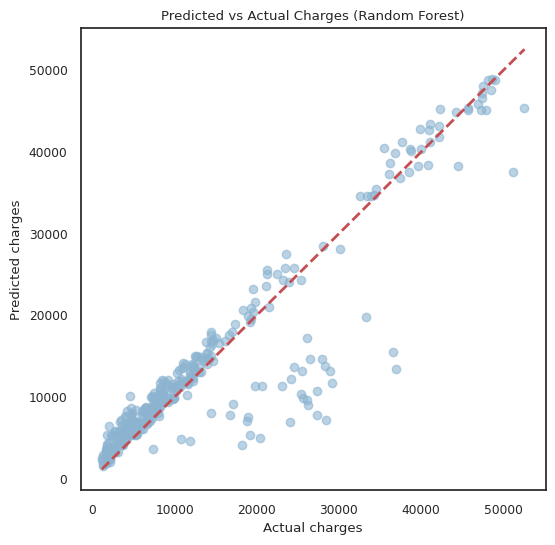

In [ ]:
#Predicted vs Actual plot
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, forest_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)  # 45° line
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.title("Predicted vs Actual Charges (Random Forest)")
plt.show()


We can see here that the Random Forest predictions are far more accurate.

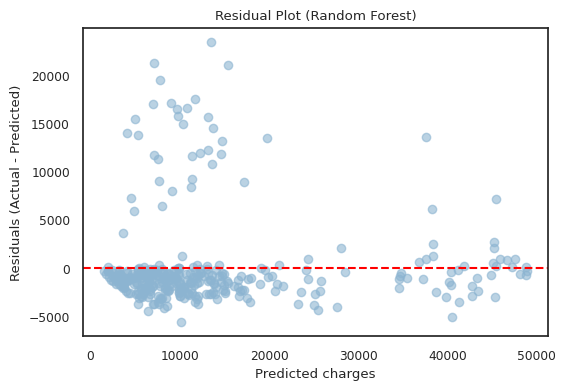

In [ ]:
residuals = y_test - forest_test_pred

plt.figure(figsize=(6,4))
plt.scatter(forest_test_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted charges")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot (Random Forest)")
plt.show()


Feature importance ranking

1. smoker_yes (0.350251)
2. smoker_no (0.337446)
3. bmi (0.172893)
4. age (0.118659)
5. children (0.012149)
6. region_northeast (0.002307)
7. region_northwest (0.001889)
8. region_southeast (0.001257)
9. sex_female (0.001215)
10. sex_male (0.001061)
11. region_southwest (0.000874)


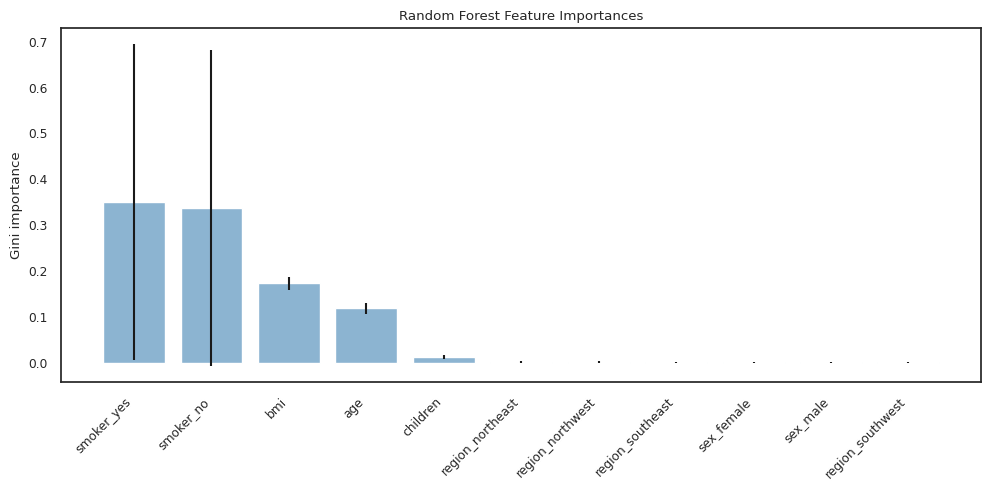

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("Feature importance ranking\n")


importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)


feature_names = np.array(X_train.columns)


indices = np.argsort(importances)[::-1]




for rank, idx in enumerate(indices, start=1):
    print(f"{rank}. {feature_names[idx]} ({importances[idx]:.6f})")


plt.figure(figsize=(10, 5))
plt.title("Random Forest Feature Importances")
plt.bar(feature_names[indices],
        importances[indices],
        yerr=std[indices],
        align="center")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Gini importance")
plt.tight_layout()
plt.show()


##Learning curves (for diagnose overfitting or underfitting)

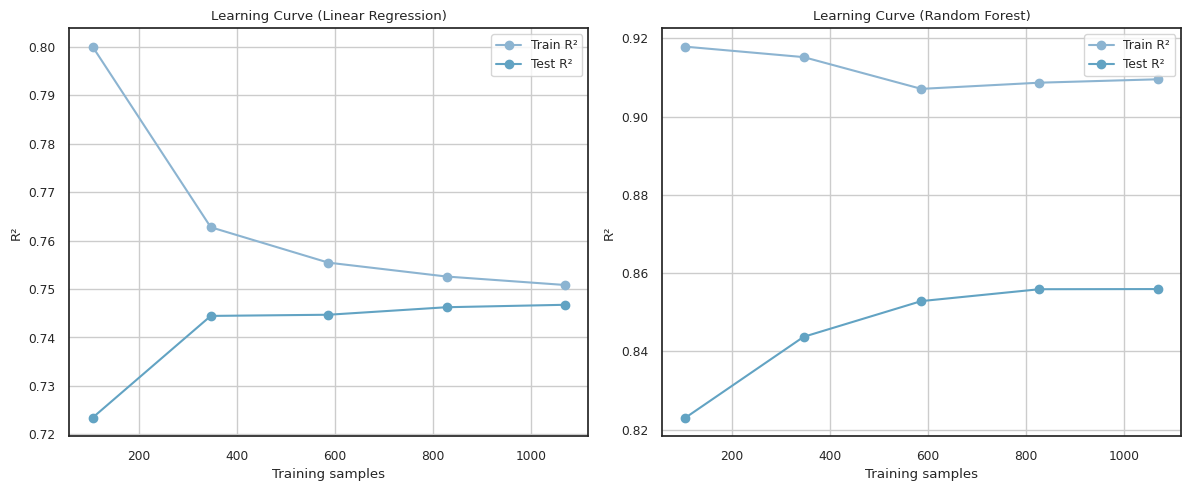

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

models = {
    "Linear Regression": LR,
    "Random Forest": forest
}

plt.figure(figsize=(12,5))

for i, (name, model) in enumerate(models.items(), 1):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
    )

    plt.subplot(1, 2, i)
    plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label="Train R²")
    plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label="Test R²")
    plt.xlabel("Training samples")
    plt.ylabel("R²")
    plt.title(f"Learning Curve ({name})")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


Solve the overfitting in RF with cross-validation to tune



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(200, 1000),
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 0.5]
}

rs = RandomizedSearchCV(
    forest, param_distributions=param_dist,
    n_iter=50, cv=5, scoring='r2',
    random_state=42, n_jobs=-1
)
rs.fit(X_train, y_train)
print("Best parameters:", rs.best_params_)


Best parameters: {'max_depth': 7, 'max_features': 0.5, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 688}


In [ ]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor


# Features & target
X = df.drop(['charges'], axis=1)
y = df['charges']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#use the best parameters from the Cross-validation

forest = RandomForestRegressor(
    n_estimators=688,
    max_depth=7,
    max_features=0.5,
    min_samples_split=8,
    min_samples_leaf=3,
    criterion='squared_error',
    random_state=42,
    n_jobs=-1
)

forest.fit(X_train, y_train)

forest_train_pred = forest.predict(X_train)
forest_test_pred = forest.predict(X_test)

print(f'R² score (test set): {forest.score(X_test, y_test):.3f}')

print('MSE train data: %.3f, MSE test data: %.3f' % (
    mean_squared_error(y_train, forest_train_pred),
    mean_squared_error(y_test, forest_test_pred)
))
print('R2 train data: %.3f, R2 test data: %.3f' % (
    r2_score(y_train, forest_train_pred),
    r2_score(y_test, forest_test_pred)
))

R² score (test set): 0.851
MSE train data: 13893461.591, MSE test data: 23703968.547
R2 train data: 0.902, R2 test data: 0.851


In [ ]:
#Gather the models in a table
results = []

# Linear Regression
results.append({
    'Model': 'Linear Regression',
    'R2_train': r2_score(y_train, y_train_pred),
    'R2_test': r2_score(y_test, y_test_pred),
    'MSE_train': mean_squared_error(y_train, y_train_pred),
    'MSE_test': mean_squared_error(y_test, y_test_pred)
})

# Random Forest
results.append({
    'Model': 'Random Forest',
    'R2_train': r2_score(y_train, forest_train_pred),
    'R2_test': r2_score(y_test, forest_test_pred),
    'MSE_train': mean_squared_error(y_train, forest_train_pred),
    'MSE_test': mean_squared_error(y_test, forest_test_pred)
})

# Convert to DataFrame
results_df = pd.DataFrame(results)

print("\nModel Comparison:")
print(results_df)


Model Comparison:
               Model  R2_train  R2_test   MSE_train    MSE_test
0  Linear Regression      0.75     0.74 35256307.11 40842992.19
1      Random Forest      0.90     0.85 13893461.59 23703968.55


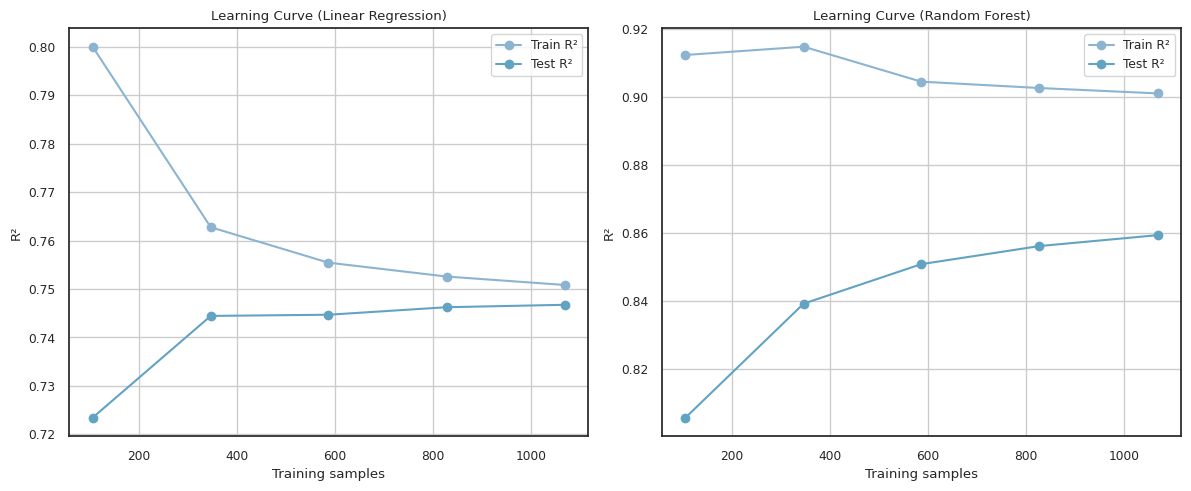

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

models = {
    "Linear Regression": LR,
    "Random Forest": forest
}

plt.figure(figsize=(12,5))

for i, (name, model) in enumerate(models.items(), 1):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
    )

    plt.subplot(1, 2, i)
    plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label="Train R²")
    plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label="Test R²")
    plt.xlabel("Training samples")
    plt.ylabel("R²")
    plt.title(f"Learning Curve ({name})")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


Questions & Answers

1.  What specific problem does your project aim to solve? If possible, describe the benefit of using Machine Learning techniques over conventional methods if any.

The goal of this project is to predict a patient’s medical insurance charges (charges) from demographic and lifestyle variables (age, sex, BMI, children, smoker, region).


Why Machine Learning vs. conventional methods:

Relationships are non-linear (e.g., sharp jump in cost for smokers and for high BMI). ML models (e.g., tree ensembles) capture these interactions better than a single global formula.

ML supports systematic validation (cross-validation) and feature engineering with measurable gains.

2.  Although not the focus of this assignment, it is desirable to at least briefly present your data. For example, in exploratory data analysis you will explain what you learned about your data and you will include if you want graphs that support your findings.


Now we use an overall correlation matrix for all the variables.

It seems that:

- There is strongest positive correlation between smoker (yes) and charges and a smoker is the single most important predictor of higher charges. And the opposite we have strong negative correlation for not smokers.

- There is a small positive correlation between age and charges which it means that probably the older people tend to have higher charges, but it is not perfectly linear to make assumption for this.

- The bmi and charges has a 0.2 correlation, a weak positive correlation it means maybe the higher bmi tends to increase charges.

- The number of children doesnt correlated with charges.

- The sex (female or male) has correlation close to 0 with the charges. So, sex doesn't play a role in charges in this dataset.

-Also, the regions has negligible effect on charges.

In cocnlusion

This means that smokers pay much higher medical costs that the non smokers.

Older participants tend to have higher charges.

Higher BMI is weakly linked to higher charges.

These findings suggest that lifestyle choices (especially smoking) and age are the primary drivers of medical expenses.






4. Performance & Evaluation

Regression metrics: MAE, RMSE, R².



| Model                 | R² (Train) | R² (Test) | MSE (Train)   | MSE (Test)    |
| --------------------- | ---------- | --------- | ------------- | ------------- |
| **Linear Regression** | 0.75       | 0.74      | 35,256,307.11 | 40,842,992.19 |
| **Random Forest**     | 0.98       | 0.84      | 3,390,158.15  | 25,771,591.68 |



5. Overffiting/Underfitting Diagnosis

As we know, overfitting is when a model does much better on train  than on test whereas underfitting is the model does poorly on both train and test.

Based the result, the RF is susceptible to overfitting due to the 0.14 difference between train and test.

Another way to diagnose for overfitting or underfitting is the learning curves.  It is obvious that the learning curve of RF shows overfitting.

To solve the overfitting i use Cross-validation and afer i find the best parameters i compare R2 (train) from 0.98 to 0.90 and R2 (test) from 0.84 to 0.85, which it is obvious that we reduced the overfitting.

6. Experimental Evidence

When i alter some parameters from the RF regressor such as the n_estimators , max_depth=7 etc we can see better generaliztaion and better results.

7. Interpretation of results

Based the random forest regressor the most importance features are:

i. Smoker status

ii. Age

iii. BMI

iv. Number of children

Based the results, better model is random forest regressor because it has higher R2 (0.84 vs 0.74 ) and lower MSE (25.7 M vs 41 M) on test set.

However, due to the plots (predicted vs actual) we can see that the LR model underestimates high and mid medical charges. On the other, hand the RFG model predict better the predicted and actual values in the mid and high medical charges.  




8. Suggest improvements: If the model performed poorly, discuss potential reasons and suggest ways to improve it. This could involve using a different model, engineering new features, or collecting more data.

Some ways to improve the model accuracy is to change the modeling using gradient boosting (XGBoost, CatBoost) because  they build trees sequentially, correcting errors from the previous ones.

Also, expand the dataset collecting more samples would give the model more variation to learn, improve generalization and reduce variance.

Moreover, to add more variables such as chronic conditions, blood pressure, diabetes, diet etc.

#Step. 9 Save the models

In [ ]:
import joblib

# Save only the trained model (e.g., Random Forest)
joblib.dump(forest, "random_forest_model.pkl")
print("✅ Model saved to random_forest_model.pkl")

# Load it back
loaded_model = joblib.load("random_forest_model.pkl")

# Use it (make sure to preprocess new data exactly like training)
y_pred = loaded_model.predict(X_test)
print("Predictions:", y_pred[:5])

✅ Model saved to random_forest_model.pkl
Predictions: [ 3482.94032214  9808.3253087  10600.48120245 33859.11990718
 10344.05163085]


In [ ]:
import joblib
from sklearn.linear_model import LogisticRegression

# 1. Train your model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# 2. Save the trained model instance
joblib.dump(log_reg, "LogisticRegression_model.pkl")
print("✅ Model saved to LogisticRegression_model.pkl")

# 3. Load it back
loaded_model = joblib.load("LogisticRegression_model.pkl")



✅ Model saved to LR.pkl
Predictions: [ 5019.61980031  9401.16801476 11354.74200776 26301.84260625
  7002.39592176]
